# ANN: Regression (Website Traffic)

## Imports

In [1]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

## Loads and process data

In [2]:
df = pd.read_csv("./Data/website_data.csv")

In [3]:
df.columns

Index(['Page Views', 'Session Duration', 'Bounce Rate', 'Traffic Source',
       'Time on Page', 'Previous Visits', 'Conversion Rate'],
      dtype='object')

In [4]:
df = df[['Page Views', 'Session Duration', 'Bounce Rate',
       'Time on Page', 'Previous Visits', 'Conversion Rate']]

In [5]:
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

## X en y-variabelen definieren

In [6]:
X = df[['Page Views', 'Bounce Rate', 'Time on Page',
        'Previous Visits', 'Conversion Rate']]
y = df[['Session Duration']]

## Test/train/validation-split

In [7]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

## Neural Network

In [15]:
model = keras.Sequential(
    [
        layers.Dense(32, activation="relu", input_shape=(5,)),
        layers.Dropout(0.3),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(1)
    ]
)

model.compile(optimizer='adam', loss='mse')

model.summary()

C:\Users\ruben\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,753 (42.00 KB)

 Trainable params: 10,753 (42.00 KB)

 Non-trainable params: 0 (0.00 B)

## Start training of NN

In [16]:
model.fit(x=X_train, y=y_train, epochs=350, validation_data=(X_val, y_val))

Epoch 1/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.6089 - val_loss: 7.6196
Epoch 2/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5830 - val_loss: 8.2178
Epoch 3/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8657 - val_loss: 7.8936
Epoch 4/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6297 - val_loss: 8.1185
Epoch 5/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.7632 - val_loss: 7.8350
Epoch 6/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.4951 - val_loss: 7.7914
Epoch 7/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6024 - val_loss: 7.9219
Epoch 8/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3920 - val_loss: 7.4093
Epoch 9/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.5495 - val_loss: 7.4485
Epoch 10/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.0217 - val_loss: 7.2052
Epoch 11/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.3635 - val_loss: 7.2978
Epoch 12/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.0

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.6608 - val_loss: 6.5185
Epoch 70/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.7209 - val_loss: 6.5209
Epoch 71/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.8346 - val_loss: 6.5376
Epoch 72/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.1949 - val_loss: 6.5615
Epoch 73/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.9306 - val_loss: 6.5544
Epoch 74/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.5139 - val_loss: 6.5790
Epoch 75/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.7689 - val_loss: 6.5676
Epoch 76/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.3859 - val_loss: 6.5830
Epoch 77/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.5525 - val_loss: 6.5950
Epoch 78/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.9065 - val_loss: 6.5606
Epoch 79/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.6005 - val_loss: 6.5983
Epoch 80/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2711 

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.3661 - val_loss: 6.5847
Epoch 138/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.9707 - val_loss: 6.5999
Epoch 139/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.6481 - val_loss: 6.6312
Epoch 140/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.3887 - val_loss: 6.6283
Epoch 141/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.0036 - val_loss: 6.6220
Epoch 142/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.3476 - val_loss: 6.6257
Epoch 143/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2329 - val_loss: 6.6168
Epoch 144/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.1375 - val_loss: 6.6024
Epoch 145/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.5176 - val_loss: 6.6416
Epoch 146/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.5177 - val_loss: 6.6015
Epoch 147/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3770 - val_loss: 6.6055
Epoch 148/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

Epoch 205/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6088 - val_loss: 6.7170
Epoch 206/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2174 - val_loss: 6.7065
Epoch 207/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.4345 - val_loss: 6.6977
Epoch 208/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5181 - val_loss: 6.7646
Epoch 209/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6026 - val_loss: 6.7006
Epoch 210/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7872 - val_loss: 6.6963
Epoch 211/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.7796 - val_loss: 6.6997
Epoch 212/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.6004 - val_loss: 6.6806
Epoch 213/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1352 - val_loss: 6.7095
Epoch 214/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3062 - val_loss: 6.7586
Epoch 215/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7989 - val_loss: 6.6902
Epoch 216/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.4574 - val_loss: 6.7530
Epoch 273/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.4921 - val_loss: 6.7244
Epoch 274/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.3596 - val_loss: 6.7351
Epoch 275/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.6676 - val_loss: 6.6996
Epoch 276/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2648 - val_loss: 6.7540
Epoch 277/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.7049 - val_loss: 6.6841
Epoch 278/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.5157 - val_loss: 6.7078
Epoch 279/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2698 - val_loss: 6.7009
Epoch 280/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.8970 - val_loss: 6.7250
Epoch 281/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.3738 - val_loss: 6.7451
Epoch 282/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.7712 - val_loss: 6.7362
Epoch 283/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

Epoch 340/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.7866 - val_loss: 6.7945
Epoch 341/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.5442 - val_loss: 6.7525
Epoch 342/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.8904 - val_loss: 6.8125
Epoch 343/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.7434 - val_loss: 6.7275
Epoch 344/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2968 - val_loss: 6.7400
Epoch 345/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.6842 - val_loss: 6.6918
Epoch 346/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.2021 - val_loss: 6.7869
Epoch 347/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.7793 - val_loss: 6.7745
Epoch 348/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.6914 - val_loss: 6.7799
Epoch 349/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.6088 - val_loss: 6.7581
Epoch 350/350
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.3738 - val_loss: 6.7773


## Training error metrics

<AxesSubplot:>

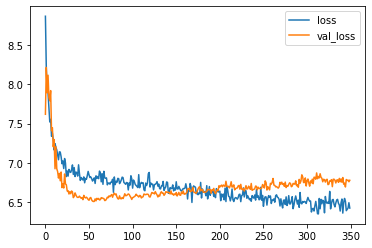

In [17]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

## Test/training data eval

In [18]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
8.062365531921387

Train data evaluation:
6.272282600402832


## Get test predictions for evaluation metrics

In [19]:
test_predictions = model.predict(X_test)

test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']


pred_df

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


,Test True Y,Model Predictions
0,2.694311,2.962226
1,2.567793,2.882178
2,1.587478,6.234189
3,0.674860,3.561222
4,4.072898,2.597969
...,...,...
273,1.339168,2.529685
274,1.058478,2.468999
275,1.151926,3.158294
276,1.200144,2.680356


## Metrics

<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

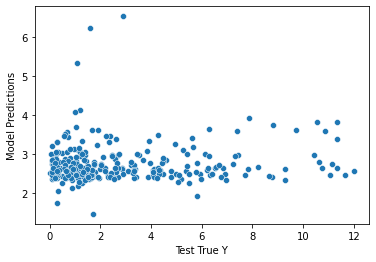

In [20]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

## Error regression metrics

In [21]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "sec")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "sec^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "sec")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
2.21 sec

MSE
8.06 sec^2

RMSE:
2.84 sec

R-squared:
-0.0

Explained variance score:
-0.0
